In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

In [3]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
colunas = {'mileage_per_year': 'milhas_por_ano',
           'model_year' : 'ano_do_modelo',
           'price' : 'preco',
           'sold' : 'vendido'    
}

dados = dados.rename(columns = colunas)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6
...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,14
9996,9996,13246,2002,107424.63,1,18
9997,9997,13018,2014,93856.99,0,6
9998,9998,10464,2011,51250.57,1,9


In [7]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [8]:
dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis = 1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [9]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25,
                                                       stratify = y) ## stratify = y quer dizer para que os dados


print(f'Dados de treinamento {len(treino_x)} e dados de teste {len(teste_x)}')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = (accuracy_score(teste_y, previsoes) * 100).round(4)
print(f'Acurácia de: {acuracia}%')



Dados de treinamento 7500 e dados de teste 2500
Acurácia de: 57.96%


/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
## Fazendo um teste "dummy" para medir o quanto a acurácia do nosso modelo está performando

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
dummy_stratified.score(teste_x, teste_y)
##previsoes = dummy_stratified.predict(teste_x)

##acuracia = (accuracy_score(teste_y, previsoes) * 100).round()
##print(f'A acuracia foi {acuracia}')

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.516

In [12]:
## Fazendo um teste "dummy" para medir o quanto a acurácia do nosso modelo está performando

from sklearn.dummy import DummyClassifier

dummy_mf = DummyClassifier()
dummy_mf.fit(treino_x, treino_y)
previsoes = dummy_mf.predict(teste_x)

acuracia = (accuracy_score(teste_y, previsoes) * 100).round()
print(f'A acuracia foi {acuracia}')

A acuracia foi 50.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25,
                                                       stratify = y) ## stratify = y quer dizer para que os dados


print(f'Dados de treinamento {len(treino_x)} e dados de teste {len(teste_x)}')

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = (accuracy_score(teste_y, previsoes) * 100).round(4)
print(f'Acurácia de: {acuracia}%')


Dados de treinamento 7500 e dados de teste 2500
Acurácia de: 77.48%


## DECISION TREE


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25,
                                                       stratify = y) ## stratify = y quer dizer para que os dados


print(f'Dados de treinamento {len(treino_x)} e dados de teste {len(teste_x)}')

## Arvore de decisao nao precisa de SCALER
#scaler = StandardScaler()
#scaler.fit(treino_x)
#treino_x = scaler.transform(raw_treino_x)
#teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = (accuracy_score(teste_y, previsoes) * 100).round(4)
print(f'Acurácia de: {acuracia}%')


Dados de treinamento 7500 e dados de teste 2500
Acurácia de: 79.28%


In [15]:
conda install graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


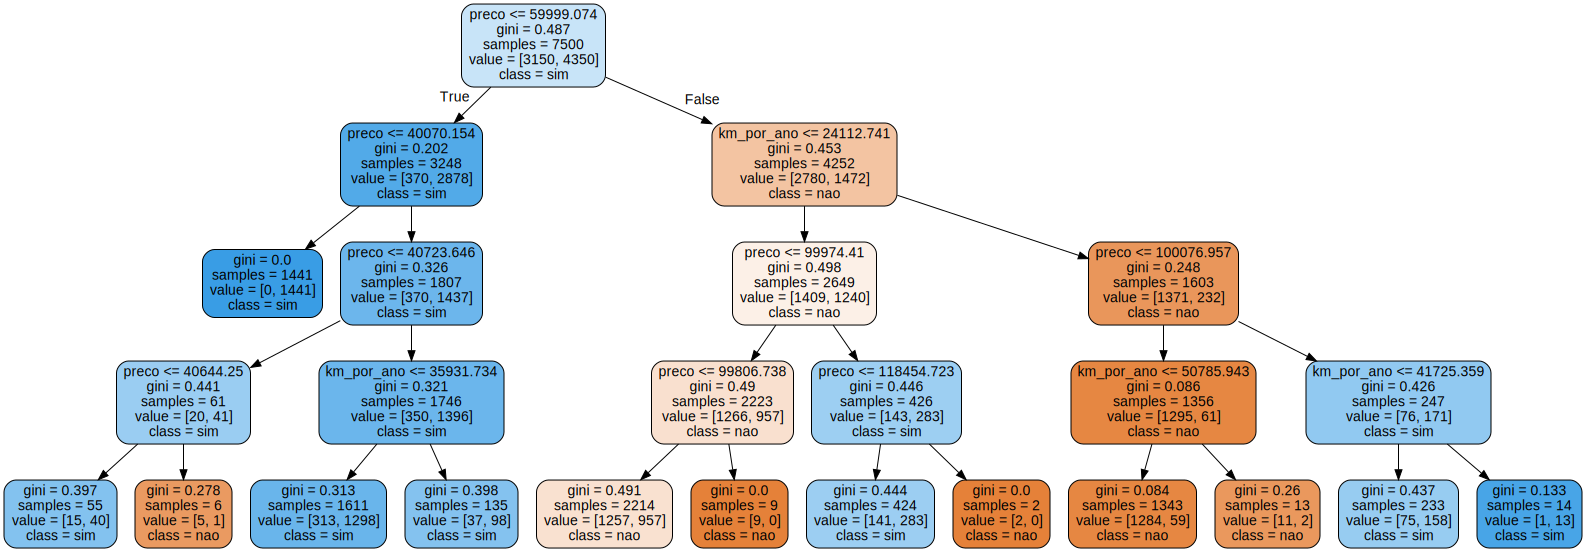

In [27]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file = None,
                           filled = True, rounded = True,
                          feature_names = features,
                          class_names = ['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico

In [17]:
conda install python-graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
